Objetivos dentro da temporada 20-21:
- Conferir quais são os principais jogadores em cada atributo por posição
- Encontrar em qual idade se concentra os salários dos jogadores
- Nível de performance por idade
- Em quais times se concentram os dados realizados
- Checar relação entre IMC dos jogadores e performance média de forma geral e por posição
- Relação double double x salário





In [ ]:
#importação de libs
import pandas as pd
import numpy as np

#nomeação de dataframe
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projeto nba/players.csv')
data.head()

,Name,Position,Team,Age,Height,Height_i,Weight,College,Salary,Points,Rebounds,Assists
0,Juhann Begarin,SG,Boston Celtics,19,"6' 5""",6.50,185,NaN,NaN,NaN,NaN,NaN
1,Jaylen Brown,SG,Boston Celtics,24,"6' 6""",6.60,223,California,26758928.0,24.7,6.0,3.4
2,Kris Dunn,PG,Boston Celtics,27,"6' 3""",6.30,205,Providence,5005350.0,1.3,1.5,0.5
3,Carsen Edwards,PG,Boston Celtics,23,"5' 11""",5.11,200,Purdue,1782621.0,4.0,0.8,0.5
4,Tacko Fall,C,Boston Celtics,25,"7' 5""",7.50,311,UCF,NaN,2.5,2.7,0.2


In [ ]:
#verificação de quantas linhas e colunas possuem no arquivo
data.shape


(558, 12)

In [ ]:
#excluindo coluna height
data = data.drop(columns = ['Height'], axis=0)

In [ ]:
#renomeando coluna 
data = data.rename(columns={'Height_i': 'Height'})

In [ ]:
#criando coluna convertendo a 'height' que está em pés para centímetros, o mesmo para 'weight' convertendo-o de libras para kg
data['Height_cm'] = data.iloc[:,4].mul(30.48).round(2)
data['Weight_kg'] = data.iloc[:,5].mul(0.453592).round(2)
data.head()

,Name,Position,Team,Age,Height,Weight,College,Salary,Points,Rebounds,Assists,Height_cm,Weight_kg
0,Juhann Begarin,SG,Boston Celtics,19,6.50,185,NaN,NaN,NaN,NaN,NaN,198.12,83.91
1,Jaylen Brown,SG,Boston Celtics,24,6.60,223,California,26758928.0,24.7,6.0,3.4,201.17,101.15
2,Kris Dunn,PG,Boston Celtics,27,6.30,205,Providence,5005350.0,1.3,1.5,0.5,192.02,92.99
3,Carsen Edwards,PG,Boston Celtics,23,5.11,200,Purdue,1782621.0,4.0,0.8,0.5,155.75,90.72
4,Tacko Fall,C,Boston Celtics,25,7.50,311,UCF,NaN,2.5,2.7,0.2,228.60,141.07


In [ ]:
#separação de variáveis para calcular o índice de massa corporal de cada jogador
#o cálculo é peso/(altura**2)
#criação de coluna de IMC conforme os resultados calculados
#criação de coluna dos status de imc com criação de variáveis diferentes conforme resultado com a função select do numpy
peso = data.iloc[:, -1]
altura = data.iloc[:, -2]
data['IMC'] = ((peso/(altura**2))*10000).round(2)
imc_list = [
               (data['IMC']< 25),
               (data['IMC']>= 25) & (data['IMC']<= 29.9),
               (data['IMC']>= 30)]
status_list = ['Normal','Acima','Obeso']
data['IMC_Status'] = np.select(imc_list, status_list, default = 'Nao Especificado')



In [ ]:
data.head()

,Name,Position,Team,Age,Height,Weight,College,Salary,Points,Rebounds,Assists,Height_cm,Weight_kg,IMC,IMC_Status
0,Juhann Begarin,SG,Boston Celtics,19,6.50,185,NaN,NaN,NaN,NaN,NaN,198.12,83.91,21.38,Normal
1,Jaylen Brown,SG,Boston Celtics,24,6.60,223,California,26758928.0,24.7,6.0,3.4,201.17,101.15,24.99,Normal
2,Kris Dunn,PG,Boston Celtics,27,6.30,205,Providence,5005350.0,1.3,1.5,0.5,192.02,92.99,25.22,Acima
3,Carsen Edwards,PG,Boston Celtics,23,5.11,200,Purdue,1782621.0,4.0,0.8,0.5,155.75,90.72,37.40,Obeso
4,Tacko Fall,C,Boston Celtics,25,7.50,311,UCF,NaN,2.5,2.7,0.2,228.60,141.07,26.99,Acima



**Exploração de dados**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#analisando a quantidade de jogadores por posição
data.value_counts(data['Position'])

Position
SG    131
SF    106
PG    102
PF     96
C      88
F      20
G      15
dtype: int64

In [ ]:
#analisando a quantidade de jogadores por time
data.value_counts(data['Team'])

Team
Brooklyn Nets             25
Memphis Grizzlies         22
Orlando Magic             21
Charlotte Hornets         21
Oklahoma City Thunder     21
New York Knicks           21
Houston Rockets           21
Milwaukee Bucks           20
Philadelphia Sixers       20
San Antonio Spurs         19
Golden State Warriors     19
Boston Celtics            19
Portland Trail Blazers    18
Washington Wizards        18
Sacremento Kings          18
Los Angeles Clippers      18
Detroit Pistons           18
Dallas Mavericks          18
Utah Jazz                 18
Indiana Pacers            18
Phoenix Suns              17
Toronto Raptors           17
Atlanta Hawks             17
New Orleans Pelicans      17
Denver Nuggets            17
Chicago Bulls             17
Miami Heat                17
Los Angeles Lakers        16
Minnesota Timberwolves    15
Cleveland Cavaliers       15
dtype: int64

In [ ]:
#verificando o jogador mais alto
top_height = data.nlargest(10, 'Height_cm')[['Name','Height_cm','Position']]
top_height

,Name,Height_cm,Position
4,Tacko Fall,228.60,C
383,Boban Marjanovic,225.55,C
386,Kristaps Porzingis,222.50,C
8,Luke Kornet,219.46,C
372,Moses Brown,219.46,C
470,Bol Bol,219.46,C
143,Balsa Koprivica,216.41,C
262,Jon Teske,216.41,C
461,Jakob Poeltl,216.41,C
548,Rudy Gobert,216.41,C


In [ ]:
#média de altura
media_height = data['Height_cm'].mean().round(2)
media_height

197.88

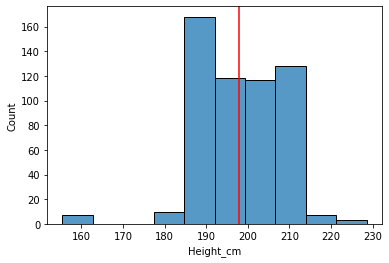

In [ ]:
#observando a média dentro da quantidade de jogadores por altura
plot = sns.histplot(x = 'Height_cm', data = data, bins = 10)
plt.axvline(media_height, color ='r')

In [ ]:
#verificando jogador mais pesado
top_weight_kg	 = data.nlargest(10, 'Weight_kg')[['Name','Weight_kg','Position']]
top_weight_kg	

,Name,Weight_kg,Position
4,Tacko Fall,141.07,C
383,Boban Marjanovic,131.54,C
534,Jusuf Nurkic,131.54,C
449,Zion Williamson,128.82,PF
480,Nikola Jokic,128.82,C
182,Brook Lopez,127.91,C
257,Robin Lopez,127.46,C
69,Joel Embiid,127.01,C
540,Udoka Azubuike,127.01,C
68,Andre Drummond,126.55,C


In [ ]:
#média de peso
media_weight = data['Weight_kg'].mean().round(2)
media_weight

98.05

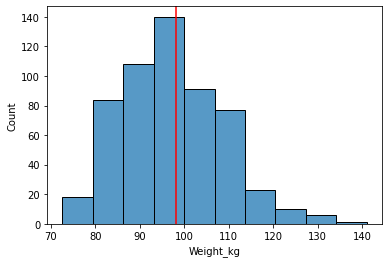

In [ ]:
#observando a média dentro da quantidade de jogadores por peso
plot = sns.histplot(x = 'Weight_kg', data = data, bins = 10)
plt.axvline(media_weight, color ='r')

In [ ]:
#verificando maiores imc
top_imc	 = data.nlargest(10, 'IMC')[['Name','IMC','Position']]
top_imc	

,Name,IMC,Position
534,Jusuf Nurkic,37.93,C
3,Carsen Edwards,37.40,PG
480,Nikola Jokic,37.14,C
540,Udoka Azubuike,36.74,C
68,Andre Drummond,36.61,C
471,Facundo Campazzo,36.60,PG
39,Jahlil Okafor,35.43,C
248,Wendell Carter Jr.,35.43,C
306,DeMarcus Cousins,35.43,C
110,Cristiano Felicio,35.31,PF


In [ ]:
media_imc = data['IMC'].mean().round(2)
media_imc

25.16

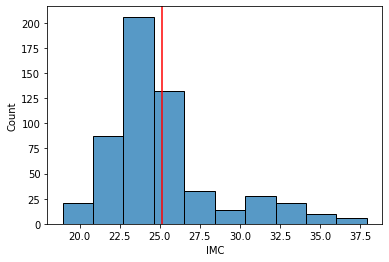

In [ ]:
plot = sns.histplot(x = 'IMC', data = data, bins = 10)
plt.axvline(media_imc, color ='r')

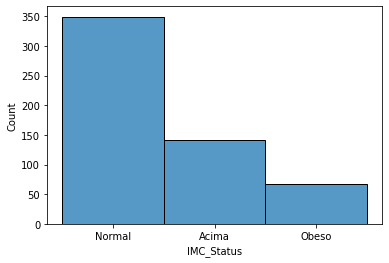

In [ ]:
sns.histplot(x = 'IMC_Status', data=data)

In [ ]:
#visualização da distribuição de dados dentro de 'Points'
data['Points'].describe()

count    476.000000
mean       9.692227
std        6.448994
min        0.100000
25%        5.000000
50%        8.100000
75%       13.025000
max       32.000000
Name: Points, dtype: float64

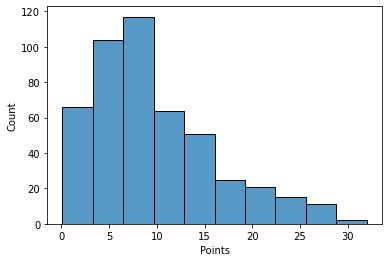

In [ ]:
plot = sns.histplot(x = 'Points', data = data, bins = 10)

In [ ]:
#visualização dos jogadores com maior média de pontos
#top 10 pontuadores
top_player_point = data.nlargest(10, 'Points')[['Name','Points','Position']]
top_player_point

,Name,Points,Position
287,Stephen Curry,32.0,PG
267,Bradley Beal,31.3,SG
529,Damian Lillard,28.8,PG
69,Joel Embiid,28.5,C
171,Giannis Antetokounmpo,28.1,PF
378,Luka Doncic,27.7,PG
113,Zach LaVine,27.4,SG
449,Zion Williamson,27.0,PF
25,Kevin Durant,26.9,PF
31,Kyrie Irving,26.9,PG


In [ ]:
top_player_assist = data.nlargest(10, 'Assists')[['Name','Assists','Position']]
top_player_assist

,Name,Assists,Position
336,Russell Westbrook,11.7,PG
29,James Harden,10.8,SG
206,Trae Young,9.4,PG
288,Draymond Green,8.9,PF
348,Chris Paul,8.9,PG
378,Luka Doncic,8.6,PG
480,Nikola Jokic,8.3,C
331,LeBron James,7.8,SF
529,Damian Lillard,7.5,PG
426,Ja Morant,7.4,PG


In [ ]:
top_player_rebound = data.nlargest(10, 'Rebounds')[['Name','Rebounds','Position']]
top_player_rebound

,Name,Rebounds,Position
191,Clint Capela,14.3,C
548,Rudy Gobert,13.5,C
448,Jonas Valanciunas,12.5,C
68,Andre Drummond,12.0,C
116,Nikola Vucevic,11.7,C
336,Russell Westbrook,11.5,PG
7,Enes Kanter,11.0,C
171,Giannis Antetokounmpo,11.0,PF
480,Nikola Jokic,10.8,C
69,Joel Embiid,10.6,C


#  **Exploração da coluna Points**

In [ ]:
#criação de filtro para cada posição explorada
data_pg = data.query("Position == 'PG'")
data_sg = data.query("Position == 'SG'")
data_sf = data.query("Position == 'SF'")
data_pf = data.query("Position == 'PF'")
data_c = data.query("Position == 'C'")
data_g = data.query("Position == 'G'")
data_f = data.query("Position == 'F'")

In [ ]:
#top 5 pontuadores na posição PG
data_pg.nlargest(5, 'Points')[['Name','Points','Position']]

,Name,Points,Position
287,Stephen Curry,32.0,PG
529,Damian Lillard,28.8,PG
378,Luka Doncic,27.7,PG
31,Kyrie Irving,26.9,PG
206,Trae Young,25.3,PG


In [ ]:
#top 5 pontuadores na posição PG
data_sg.nlargest(5, 'Points')[['Name','Points','Position']]

,Name,Points,Position
267,Bradley Beal,31.3,SG
113,Zach LaVine,27.4,SG
552,Donovan Mitchell,26.4,SG
338,Devin Booker,25.6,SG
1,Jaylen Brown,24.7,SG


In [ ]:
#top 5 pontuadores na posição PG
data_sf.nlargest(5, 'Points')[['Name','Points','Position']]

,Name,Points,Position
16,Jayson Tatum,26.4,SF
331,LeBron James,25.0,SF
313,Kawhi Leonard,24.8,SF
439,Brandon Ingram,23.8,SF
138,Jerami Grant,22.3,SF


In [ ]:
#top 5 pontuadores na posição PG
data_pf.nlargest(5, 'Points')[['Name','Points','Position']]

,Name,Points,Position
171,Giannis Antetokounmpo,28.1,PF
449,Zion Williamson,27.0,PF
25,Kevin Durant,26.9,PF
58,Julius Randle,24.1,PF
326,Anthony Davis,21.8,PF


In [ ]:
#top 5 pontuadores na posição PG
data_c.nlargest(5, 'Points')[['Name','Points','Position']]

,Name,Points,Position
69,Joel Embiid,28.5,C
480,Nikola Jokic,26.4,C
499,Karl-Anthony Towns,24.8,C
116,Nikola Vucevic,23.4,C
410,Christian Wood,21.0,C


In [ ]:
#top 5 pontuadores na posição PG
data_g.nlargest(5, 'Points')[['Name','Points','Position']]

,Name,Points,Position
47,Evan Fournier,17.1,G
435,Devonte' Graham,14.8,G
334,Kendrick Nunn,14.6,G
177,George Hill,8.7,G
128,Ricky Rubio,8.6,G


In [ ]:
#top 5 pontuadores na posição PG
data_f.nlargest(5, 'Points')[['Name','Points','Position']]

,Name,Points,Position
19,LaMarcus Aldridge,13.5,F
556,Eric Paschall,9.5,F
419,Juancho Hernangomez,7.2,F
77,Georges Niang,6.9,F
85,Precious Achiuwa,5.0,F


In [ ]:
media_idade = data['Age'].mean().round(2)
media_points = data['Points'].mean().round(2)
media_idade

25.54

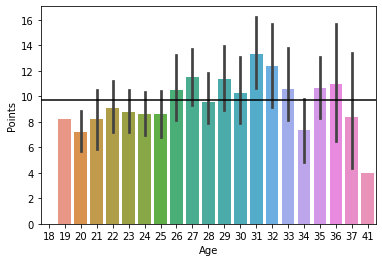

In [ ]:
#sns.pairplot(data, hue='Position')
sns.barplot(x = 'Age', y = 'Points', data = data)
plt.axhline(media_points, color ='black')


# **Exploração da coluna Assists**

In [ ]:
data_pg.nlargest(5, 'Assists')[['Name','Assists','Position']]

,Name,Assists,Position
336,Russell Westbrook,11.7,PG
206,Trae Young,9.4,PG
348,Chris Paul,8.9,PG
378,Luka Doncic,8.6,PG
529,Damian Lillard,7.5,PG


In [ ]:
data_sg.nlargest(5, 'Assists')[['Name','Assists','Position']]

,Name,Assists,Position
29,James Harden,10.8,SG
100,Fred VanVleet,6.3,SG
403,Kevin Porter Jr.,6.3,SG
508,Shai Gilgeous-Alexander,5.9,SG
161,Caris LeVert,5.2,SG


In [ ]:
data_sf.nlargest(5, 'Assists')[['Name','Assists','Position']]

,Name,Assists,Position
331,LeBron James,7.8,SF
229,Jimmy Butler,7.1,SF
107,DeMar DeRozan,6.9,SF
184,Khris Middleton,5.4,SF
313,Kawhi Leonard,5.2,SF


In [ ]:
data_pf.nlargest(5, 'Assists')[['Name','Assists','Position']]

,Name,Assists,Position
288,Draymond Green,8.9,PF
58,Julius Randle,6.0,PF
171,Giannis Antetokounmpo,5.9,PF
25,Kevin Durant,5.6,PF
468,Thaddeus Young,4.3,PF


In [ ]:
data_c.nlargest(5, 'Assists')[['Name','Assists','Position']]

,Name,Assists,Position
480,Nikola Jokic,8.3,C
228,Bam Adebayo,5.4,C
499,Karl-Anthony Towns,4.5,C
116,Nikola Vucevic,3.8,C
221,Mason Plumlee,3.6,C


In [ ]:
data_g.nlargest(5, 'Assists')[['Name','Assists','Position']]

,Name,Assists,Position
128,Ricky Rubio,6.4,G
435,Devonte' Graham,5.4,G
47,Evan Fournier,3.4,G
334,Kendrick Nunn,2.6,G
177,George Hill,2.4,G


In [ ]:
data_f.nlargest(5, 'Assists')[['Name','Assists','Position']]

,Name,Assists,Position
286,Chris Chiozza,3.0,F
289,Andre Iguodala,2.3,F
19,LaMarcus Aldridge,1.9,F
556,Eric Paschall,1.3,F
284,Jordan Bell,1.2,F


In [ ]:
media_assists = data['Assists'].mean().round(2)
media_assists

2.14

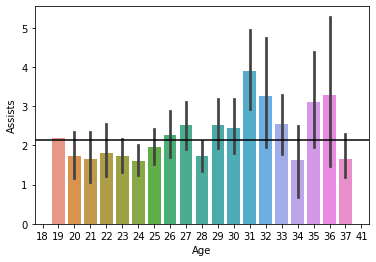

In [ ]:
#sns.pairplot(data, hue='Position')
sns.barplot(x = 'Age', y = 'Assists', data = data)
plt.axhline(media_assists, color ='black')

# **Exploração da coluna Rebound**

In [ ]:
data_pg.nlargest(5, 'Rebounds')[['Name','Rebounds','Position']]

,Name,Rebounds,Position
336,Russell Westbrook,11.5,PG
378,Luka Doncic,8.0,PG
82,Ben Simmons,7.2,PG
98,Pascal Siakam,7.2,PG
460,Dejounte Murray,7.1,PG


In [ ]:
data_sg.nlargest(5, 'Rebounds')[['Name','Rebounds','Position']]

,Name,Rebounds,Position
436,Josh Hart,8.0,SG
29,James Harden,7.9,SG
308,Paul George,6.6,SG
1,Jaylen Brown,6.0,SG
173,Elijah Bryant,6.0,SG


In [ ]:
data_sf.nlargest(5, 'Rebounds')[['Name','Rebounds','Position']]

,Name,Rebounds,Position
331,LeBron James,7.7,SF
16,Jayson Tatum,7.4,SF
484,Michael Porter Jr.,7.3,SF
229,Jimmy Butler,6.9,SF
355,Harrison Barnes,6.6,SF


In [ ]:
data_pf.nlargest(5, 'Rebounds')[['Name','Rebounds','Position']]

,Name,Rebounds,Position
171,Giannis Antetokounmpo,11.0,PF
58,Julius Randle,10.2,PF
326,Anthony Davis,7.9,PF
123,Kevin Love,7.4,PF
192,John Collins,7.4,PF


In [ ]:
data_c.nlargest(5, 'Rebounds')[['Name','Rebounds','Position']]

,Name,Rebounds,Position
191,Clint Capela,14.3,C
548,Rudy Gobert,13.5,C
448,Jonas Valanciunas,12.5,C
68,Andre Drummond,12.0,C
116,Nikola Vucevic,11.7,C


In [ ]:
data_g.nlargest(5, 'Rebounds')[['Name','Rebounds','Position']]

,Name,Rebounds,Position
128,Ricky Rubio,3.3,G
334,Kendrick Nunn,3.2,G
417,Jarrett Culver,3.1,G
47,Evan Fournier,3.0,G
435,Devonte' Graham,2.7,G


In [ ]:
data_f.nlargest(5, 'Rebounds')[['Name','Rebounds','Position']]

,Name,Rebounds,Position
19,LaMarcus Aldridge,4.5,F
284,Jordan Bell,4.0,F
419,Juancho Hernangomez,3.9,F
289,Andre Iguodala,3.5,F
85,Precious Achiuwa,3.4,F


In [ ]:
media_rebound = data['Rebounds'].mean().round(2)
media_rebound

3.86

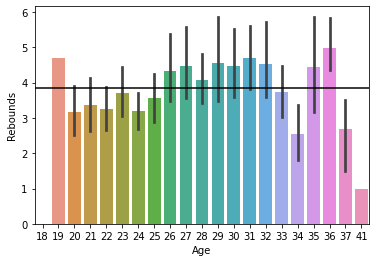

In [ ]:
sns.barplot(x = 'Age', y = 'Rebounds', data = data)
plt.axhline(media_rebound, color ='black')

# **Salários**

In [ ]:
#top 10 maiores salários
top_salarios = data.nlargest(10, 'Salary')[['Name','Salary','Age','Position']]
top_salarios

,Name,Salary,Age,Position
287,Stephen Curry,45780966.0,33,PG
29,James Harden,44310840.0,32,SG
408,John Wall,44310840.0,31,PG
336,Russell Westbrook,44211146.0,32,PG
25,Kevin Durant,42018900.0,32,PF
331,LeBron James,41180544.0,36,SF
171,Giannis Antetokounmpo,39344970.0,26,PF
308,Paul George,39344900.0,31,SG
529,Damian Lillard,39344900.0,31,PG
299,Klay Thompson,37980720.0,31,SG


In [ ]:
#times com maior folha de salário acumulado
team_salary = data.groupby('Team')['Salary'].sum()
team_salary.sort_values(ascending=False)

Team
Golden State Warriors     177282779.0
Brooklyn Nets             171633659.0
Los Angeles Clippers      164338785.0
Utah Jazz                 154717409.0
Los Angeles Lakers        149630287.0
Milwaukee Bucks           148185964.0
New York Knicks           142518097.0
Boston Celtics            142082621.0
Philadelphia Sixers       140735182.0
Toronto Raptors           137145522.0
Washington Wizards        136254438.0
Portland Trail Blazers    135098550.0
Denver Nuggets            134808541.0
Indiana Pacers            133846695.0
Atlanta Hawks             133063190.0
Chicago Bulls             132170140.0
Sacremento Kings          131838955.0
Phoenix Suns              131593332.0
Miami Heat                130954862.0
Cleveland Cavaliers       130400325.0
Minnesota Timberwolves    127379143.0
Houston Rockets           123421495.0
Dallas Mavericks          118454083.0
New Orleans Pelicans      116691835.0
San Antonio Spurs         112623535.0
Orlando Magic             111970491.0
Memphis

In [ ]:
#média de salário acumulado dos times
team_salary.mean().round(2)

130736484.37

In [ ]:
#média de salário dos jogadores
media_salario_player = data['Salary'].mean().round(2)
media_salario_player

8813695.58

In [ ]:
#10 maiores salários acumulados por faculdade
data.value_counts(data['College']).head(10)

College
Kentucky          30
Duke              27
Texas             14
UCLA              13
North Carolina    13
Kansas            12
Arizona           11
Florida State     11
Michigan          11
USC               10
dtype: int64

In [ ]:
#10 maiores salários acumulados por faculdade
team_salary = data.groupby('College')['Salary'].sum()
team_salary.sort_values(ascending=False).head(10)

College
Kentucky       327395613.0
Duke           214743574.0
UCLA           183971671.0
Texas          132952641.0
Kansas         112206273.0
USC             83110011.0
Wake Forest     69352978.0
Florida         69294618.0
Michigan        67504534.0
Louisville      61247644.0
Name: Salary, dtype: float64

In [ ]:
data['Salary'].describe()

count    4.450000e+02
mean     8.813696e+06
std      9.886777e+06
min      9.252580e+05
25%      1.802057e+06
50%      4.447896e+06
75%      1.200000e+07
max      4.578097e+07
Name: Salary, dtype: float64

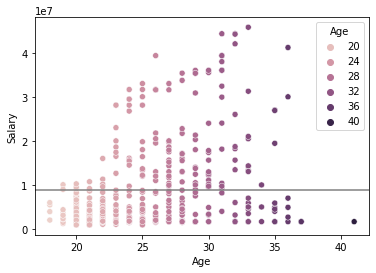

In [ ]:
#distribuição de salário por idade
sns.scatterplot(x = 'Age', y = 'Salary', hue = 'Age', data = data)
plt.axhline(media_salario_player, color ='grey')

Correlação entre salário e idade dos jogadores

In [ ]:
#importação de libs para regressão linear
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#renomeação do dataframe para separar as correlações
datacor = data

In [ ]:
datacor = datacor.dropna()
datacor.head()

,Name,Position,Team,Age,Height,Weight,College,Salary,Points,Rebounds,Assists,Height_cm,Weight_kg,IMC,IMC_Status
1,Jaylen Brown,SG,Boston Celtics,24,6.60,223,California,26758928.0,24.7,6.0,3.4,201.17,101.15,24.99,Normal
2,Kris Dunn,PG,Boston Celtics,27,6.30,205,Providence,5005350.0,1.3,1.5,0.5,192.02,92.99,25.22,Acima
3,Carsen Edwards,PG,Boston Celtics,23,5.11,200,Purdue,1782621.0,4.0,0.8,0.5,155.75,90.72,37.40,Obeso
5,Bruno Fernando,F,Boston Celtics,23,6.90,240,Maryland,1782621.0,1.5,2.4,0.3,210.31,108.86,24.61,Normal
6,Al Horford,C,Boston Celtics,35,6.90,240,Florida,27000000.0,14.2,6.7,3.4,210.31,108.86,24.61,Normal


In [ ]:
#dividindo variáveis
y = datacor.iloc[:, 3].values
X = datacor.iloc[:, 7].values


In [ ]:
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.30403378],
       [0.30403378, 1.        ]])

In [ ]:
#formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)

#criação de modelo e tranamento (fit indica q o trainamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X,y)

LinearRegression()

In [ ]:
#visualização dos coeficientes
modelo.intercept_

25.090143542673193

In [ ]:
#inclinacao
modelo.score(X,y)

0.09243654109087751

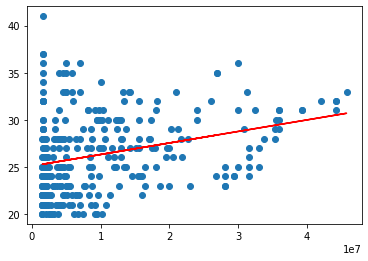

In [ ]:
#geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

# **Performance**

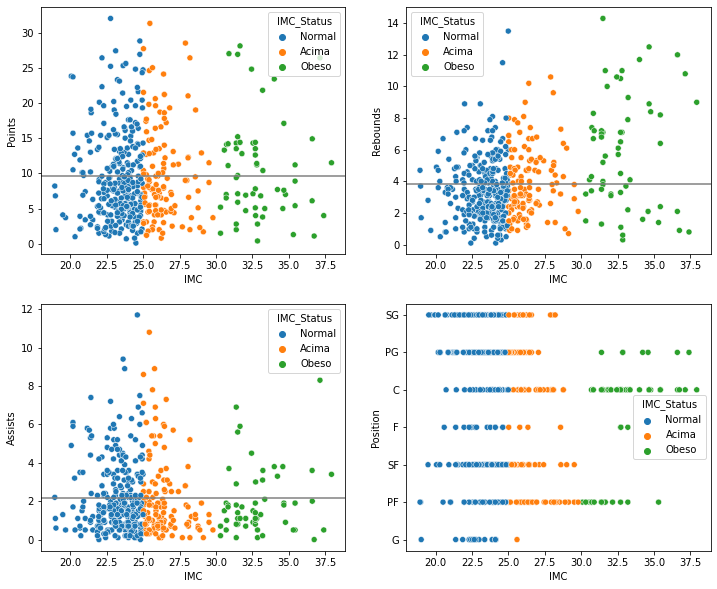

In [ ]:
# Analisando a performance em cada atributo de acordo com o IMC de cada jogador
#linhas horizontais definindo as médias de cada atributo
#definindo o tamanho das figuras
fig = plt.figure(figsize=(12, 10))
#graf 1, distribuição das médias de pontos por imc
fig.add_subplot(221)
sns.scatterplot(x = 'IMC', y = 'Points', hue = 'IMC_Status', data = data)
plt.axhline(media_points, color ='grey')
#graf 2, distribuição das médias de rebote por imc
fig.add_subplot(222)
sns.scatterplot(x = 'IMC', y = 'Rebounds', hue = 'IMC_Status', data = data)
plt.axhline(media_rebound, color ='grey')
#graf 3, distribuição das médias de assitência por imc 
fig.add_subplot(223)
sns.scatterplot(x = 'IMC', y = 'Assists', hue = 'IMC_Status', data = data)
plt.axhline(media_assists, color ='grey')
#graf 4, distribuição do imc para cada posição
fig.add_subplot(224)
sns.scatterplot(x = 'IMC', y = 'Position', hue = 'IMC_Status', data = data)


Relação Salário x PPG

In [ ]:
#dividindo variáveis
y = datacor.iloc[:, 7].values
X = datacor.iloc[:, 8].values
correlacao = np.corrcoef(X, y)
correlacao


array([[1.        , 0.76572199],
       [0.76572199, 1.        ]])

In [ ]:
#formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)

#criação de modelo e tranamento (fit indica q o trainamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X,y)

LinearRegression()

In [ ]:
#coeficiente de relação
modelo.score(X,y)

0.5863301656954074

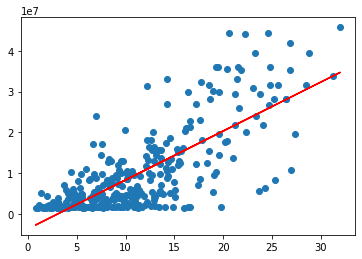

In [ ]:
#geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

Relação Salário x RPG

In [ ]:
#dividindo variáveis
y = datacor.iloc[:, 7].values
X = datacor.iloc[:, 9].values
correlacao = np.corrcoef(X, y)
correlacao


array([[1.        , 0.45743387],
       [0.45743387, 1.        ]])

In [ ]:
#formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)

#criação de modelo e tranamento (fit indica q o trainamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X,y)

LinearRegression()

In [ ]:
modelo.score(X,y)

0.20924574731551993

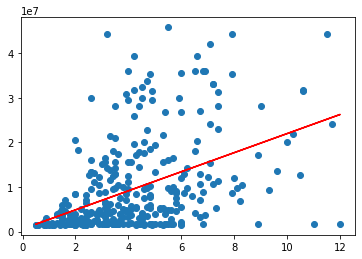

In [ ]:
#geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

Relação Salário x APG

In [ ]:
#dividindo variáveis
y = datacor.iloc[:, 7].values
X = datacor.iloc[:, 10].values
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.67958412],
       [0.67958412, 1.        ]])

In [ ]:
#formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)

#criação de modelo e tranamento (fit indica q o trainamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X,y)

LinearRegression()

In [ ]:
modelo.score(X,y)

0.46183458057106064

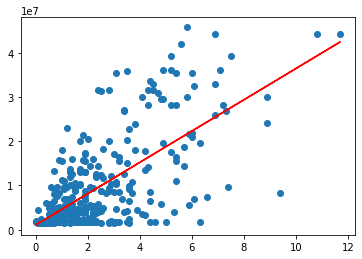

In [ ]:
#geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

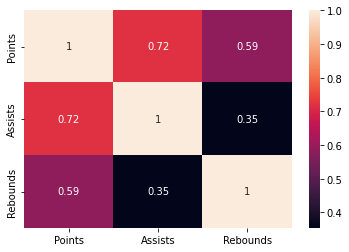

In [ ]:
#analisando correlação de cada atributo
cor_pnt_ast_rb = data[["Points", "Assists", "Rebounds"]].corr()
sns.heatmap(cor_pnt_ast_rb, annot=True)